## Research Question:

Does life satisfaction significantly predict loneliness?

## Hypothesis:

Life satisfaction negatively affects loneliness, such that higher life satisfaction is associated with lower loneliness scores.

## Methodology:

A simple linear regression will be performed using data from 3,868 participants. The dependent variable is loneliness (i.e. LONELY_ucla-loneliness_scale_score), and the independent variable was life satisfaction (i.e. WELLNESS_Life Satisfaction_scale).

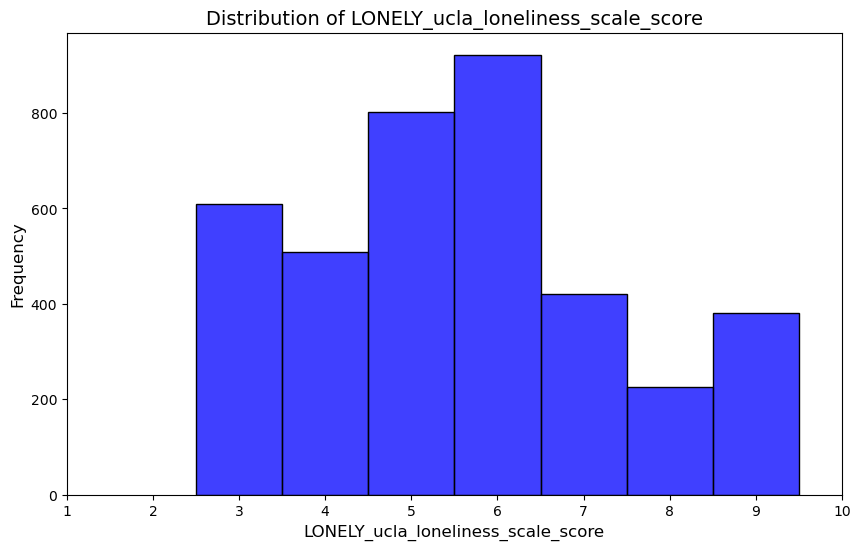

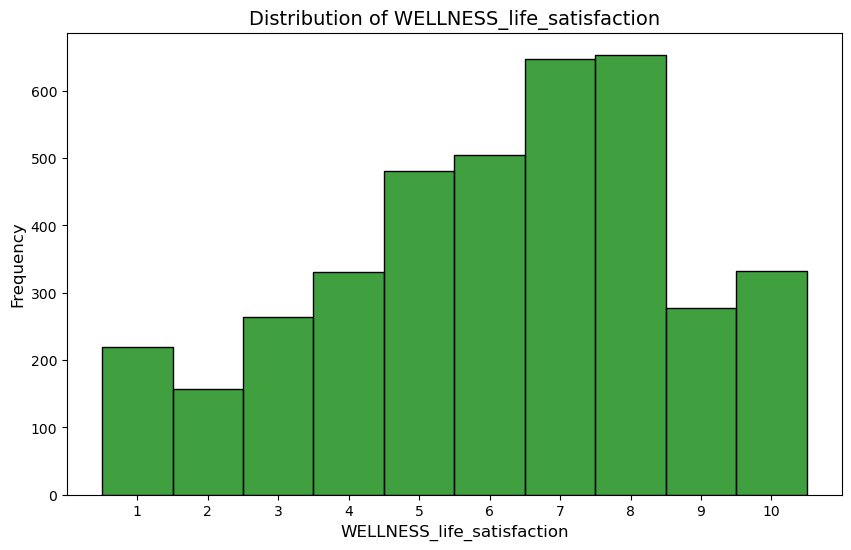

Average life satisfaction score: 6.116856256463288

Average loneliness score: 5.577559462254395


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv", 
                   na_values=["9999", "", " ", "Presented but no response", "NA"], 
                   low_memory=False)  # Suppress the warning

# Remove columns that are completely empty
empty = (data.isna().sum() == data.shape[0])
data = data[empty.index[~empty]]

# Drop rows with missing values in the columns of interest
data_clean = data.dropna(subset=['WELLNESS_life_satisfaction', 'LONELY_ucla_loneliness_scale_score'])

# Define outcome and predictor variables
outcome = 'LONELY_ucla_loneliness_scale_score'
predictor = 'WELLNESS_life_satisfaction'

# Create the histogram for the outcome variable
plt.figure(figsize=(10, 6))
sns.histplot(data_clean[outcome], bins=10, kde=False, color='blue', edgecolor='black', discrete=True)
plt.title(f'Distribution of {outcome}', fontsize=14)
plt.xlabel(outcome, fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Set x-axis to be exactly the integers 1 to 10
plt.xticks(range(1, 11))

plt.show()

# Create the histogram for the predictor variable
plt.figure(figsize=(10, 6))
sns.histplot(data_clean[predictor], bins=10, kde=False, color='green', edgecolor='black', discrete=True)
plt.title(f'Distribution of {predictor}', fontsize=14)
plt.xlabel(predictor, fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Set x-axis to be exactly the integers 1 to 10
plt.xticks(range(1, 11))

plt.show()

average_happiness = data_clean['WELLNESS_life_satisfaction'].mean()
print(f"Average life satisfaction score: {average_happiness}")

print ("")

average_loneliness = data_clean['LONELY_ucla_loneliness_scale_score'].mean()
print(f"Average loneliness score: {average_loneliness}")

## Graph Interpretation

The bar graphs above show that the lonely graph has a slight right skew, and the wellness graph follows a more normal distribution with a slight left skew. The average life satisfaction score of the participants was 6.1168, and the average loneliness score was 5.775.

## Analysis:

We will now fit the data. Below are the results and a fitted regression model for life satisfaction vs. loneliness. 

#### Null Hypothesis:

There is no relationship between how satisfied somebody is with their life with how lonely they feel.

#### Alternate Hypothesis:

There is a relationship between how satisfied somebody is with their life with how lonely they feel.

                                    OLS Regression Results                                    
Dep. Variable:     LONELY_ucla_loneliness_scale_score   R-squared:                       0.177
Model:                                            OLS   Adj. R-squared:                  0.177
Method:                                 Least Squares   F-statistic:                     833.9
Date:                                Sun, 24 Nov 2024   Prob (F-statistic):          3.22e-166
Time:                                        20:36:02   Log-Likelihood:                -7358.4
No. Observations:                                3868   AIC:                         1.472e+04
Df Residuals:                                    3866   BIC:                         1.473e+04
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
                                 coef    std err  

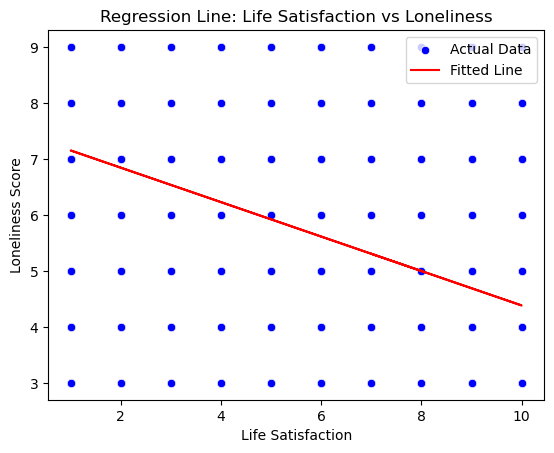

In [12]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Define outcome (y) and predictor (X) variables
X = data_clean['WELLNESS_life_satisfaction']
y = data_clean['LONELY_ucla_loneliness_scale_score']

# Add constant (intercept) to predictor variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Plot the actual data points
sns.scatterplot(x=data_clean['WELLNESS_life_satisfaction'], 
                y=data_clean['LONELY_ucla_loneliness_scale_score'], 
                label="Actual Data", color='blue')

# Plot the fitted regression line (after fitting the model)
plt.plot(data_clean['WELLNESS_life_satisfaction'], model.fittedvalues, 
         color='red', label="Fitted Line")

# Add labels and title
plt.title("Regression Line: Life Satisfaction vs Loneliness")
plt.xlabel("Life Satisfaction")
plt.ylabel("Loneliness Score")
plt.legend()

# Print the regression results
print(model.summary())

# Show the plot
plt.show()

## OLS Regression Results Summary

- R-squared: 0.177
- Number of Observations: 3,868
- F-statistic: 833.9 (p < 0.001)
- Intercept (constant): 7.4583 (p<0.001)
- Slope (life satisfaction coefficient): -0.3075 (p<0.001)


## Results Interpretation

#### Intercept (7.45837):

The predicted loneliness score for an individual with a life satisfaction score of 0 is 7.4583. This represents the baseline loneliness level without any life satisfaction. This value should be considered hypothetical, as life satisfaction scores are unlikely to be zero.

#### Slope (−0.3075):

For every one-unit increase in life satisfaction, the average loneliness score decreases by 0.3075 points. With a p-value less than 0.001, this result is unlikely to have occurred by random chance. Thus, this proves the hypothesis that higher life satisfaction is associated with lower loneliness.

#### R-squared (0.177):

Approximately 17.7% of the variability in loneliness scores is explained by life satisfaction. While this is statistically significant (as indicated by p<0.001), it also suggests that loneliness is influenced by other factors not included in this model.

#### F-statistic (833.9):

An F-statistic of 833.9 (p < 0.001) indicates that the predictor variable (i.e. ones life satisfaction) collectively improves the explanation of the dependent variable (i.e. ones loneliness) compared to a null model.

## Residuals Diagonostics

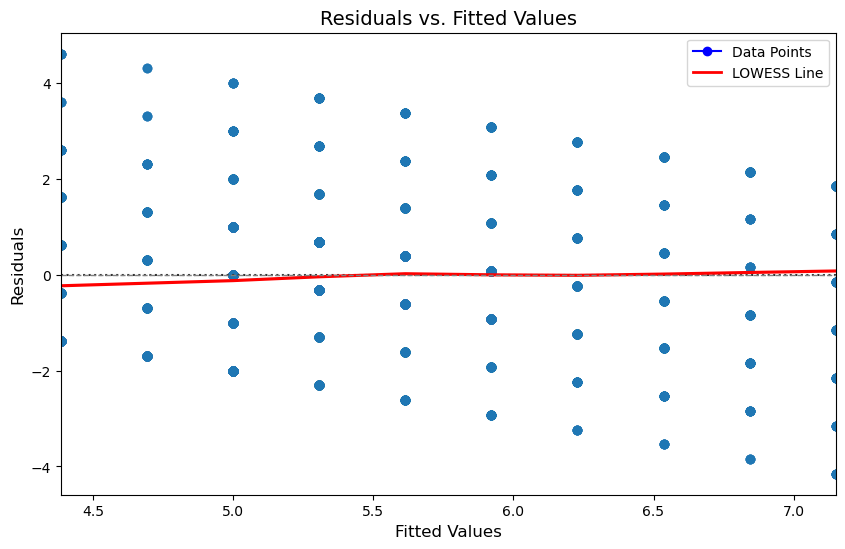

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

# Assuming 'model' is the fitted regression model
fitted_values = model.fittedvalues  # Predicted values from the model
residuals = model.resid  # Residuals: actual - predicted

# Create the residuals vs. fitted values plot
plt.figure(figsize=(10, 6))
sns.residplot(x=fitted_values, y=residuals, lowess=True, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.6})

# Add a horizontal line at 0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  

# Title and axis labels
plt.title('Residuals vs. Fitted Values', fontsize=14)
plt.xlabel('Fitted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)

# Create custom legend
scatter_legend = mlines.Line2D([], [], color='blue', marker='o', markersize=6, label='Data Points')
line_legend = mlines.Line2D([], [], color='red', linewidth=2, label='LOWESS Line')

# Add the legend to the plot
plt.legend(handles=[scatter_legend, line_legend], loc='upper right')

# Show the plot
plt.show()

## Residuals Diagonstics Results Interpretation

#### LOWESS Curve

The Locally Weighted Scatterplot Smoothing (LOWESS) curve is close to zero. This indicates that the residuals are randomly scattered around zero, meaning there's no obvious pattern after using the fitted model. This suggests that the model has captured most of the structure in the data.

#### Durbin-Watson (1.742)

This is slightly below 2, which could hint at weak positive autocorrelation. However, given the large dataset, this is likely not significant.

#### Jarque-Bera and Omnibus Tests (p < 0.001)

Residuals deviate slightly from normality. However, given the large sample size, this is unlikely to affect the results materially.

## Conclusion:

The analysis supports the alternative hypothesis that life satisfaction significantly negatively predicts loneliness. This means that as individuals report higher satisfaction with their lives, they tend to feel less lonely.

While the R-squared value indicates that other factors contribute to loneliness beyond life satisfaction, the relationship identified is statistically significant. This finding emphasizes the importance of improving life satisfaction as a great way to reduce loneliness